In [1]:
#Sarcoma-MLP-Keras
import numpy as np
import pandas as pd

# load the sarcoma transcriptome data
sarcoma_df = pd.read_csv('../Data/sarcoma-gene-exp-FPKM-zscore-no-label.csv')
sarcoma_df.shape

(206, 20605)

In [2]:
sarcoma_labels_df = pd.read_csv('../Data/sarcoma-gene-exp-FPKM-labels-only.csv')
sarcoma_labels_df.shape

(206, 1)

In [3]:
# Convert transcriptome df to np array
X = sarcoma_df.to_numpy()
print(X)

[[-0.51154087  0.09480786 -0.35176093 ...  0.51624723  0.02346097
   2.48359169]
 [-0.19129576  0.15347405  0.20261954 ... -0.41028013  2.86123234
   0.16777757]
 [ 0.26472818  2.327348   -0.56049386 ... -0.21651268  0.0192731
   0.76332633]
 ...
 [ 0.24931652 -0.03363532 -0.97441342 ... -0.50605902 -1.23871739
   0.28153212]
 [ 0.2581943  -0.8373263  -0.19647611 ... -0.29302061 -0.78367962
  -0.7597076 ]
 [-0.07085013 -0.29522455 -0.59015045 ... -0.50644652 -0.01137879
  -0.39862195]]


In [4]:
# Convert label df to np array
y_df = sarcoma_labels_df['label']
y = y_df.to_numpy()
print(y)

[4 2 2 1 5 3 2 4 4 3 4 4 4 3 0 3 1 4 2 4 4 0 2 4 3 3 3 2 0 4 4 5 3 3 2 4 4
 5 4 3 4 4 5 4 2 4 4 4 1 4 1 4 4 2 4 3 3 2 2 4 4 4 4 4 4 4 2 2 3 4 2 3 4 4
 3 4 3 2 4 3 2 3 4 4 3 4 3 4 3 4 4 1 3 4 4 4 0 4 3 4 3 3 3 5 2 0 3 3 1 1 4
 2 3 0 3 4 2 4 2 0 3 4 4 3 2 2 1 3 4 4 4 4 4 3 2 4 2 4 1 0 2 2 3 4 4 2 3 4
 4 3 1 3 4 3 4 2 2 1 3 2 2 0 4 2 1 4 2 1 4 3 3 4 2 4 2 4 3 4 2 1 3 4 2 4 4
 2 2 3 4 4 4 3 2 4 1 1 2 3 0 3 3 2 2 3 1 2]


In [5]:
import plaidml.keras
plaidml.keras.install_backend()
from keras.utils.np_utils import to_categorical
y_cat = to_categorical(y)

In [6]:
print(y_cat)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [7]:
# Split the data into three parts of development, validation and testing
# with ratios of 60%, 20%, and 20% respectively with stratification.
from sklearn.model_selection import train_test_split

In [8]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2,
    stratify=y, random_state=0
)

In [9]:
# split into development and validation sets
X_dev, X_val, y_dev, y_val = train_test_split(
    X_train, y_train, test_size=0.25,
    stratify=y_train, random_state=0
)

In [10]:
print(len(X_dev))
print(len(X_val))
print(len(X_test))

123
41
42


In [11]:
from keras import models
from keras import layers
from keras.layers import Dropout

model = models.Sequential()
model.add(layers.Dense(5000, activation='relu', input_shape=(20605,)))
model.add(Dropout(0.5))
model.add(layers.Dense(5000, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(5000, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))
                    
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_dev,
                    y_dev, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 123 samples, validate on 41 samples
Epoch 1/10
123/123 [==============================] - 1s 10ms/step - loss: 5.7592 - acc: 0.2358 - val_loss: 3.8081 - val_acc: 0.3902
Epoch 2/10
123/123 [==============================] - 1s 5ms/step - loss: 4.6247 - acc: 0.3577 - val_loss: 1.5387 - val_acc: 0.5366
Epoch 3/10
123/123 [==============================] - 1s 5ms/step - loss: 1.2311 - acc: 0.6423 - val_loss: 0.6738 - val_acc: 0.7805
Epoch 4/10
123/123 [==============================] - 1s 5ms/step - loss: 0.6606 - acc: 0.7317 - val_loss: 0.6911 - val_acc: 0.8049
Epoch 5/10
123/123 [==============================] - 1s 5ms/step - loss: 0.5046 - acc: 0.8130 - val_loss: 0.6261 - val_acc: 0.7561
Epoch 6/10
123/123 [==============================] - 1s 5ms/step - loss: 0.4621 - acc: 0.8293 - val_loss: 0.6327 - val_acc: 0.7317
Epoch 7/10
123/123 [==============================] - 1s 5ms/step - loss: 0.4036 - acc: 0.8455 - val_loss: 0.6238 - val_acc: 0.7805
Epoch 8/10
123/123 [==========

<function matplotlib.pyplot.show(*args, **kw)>

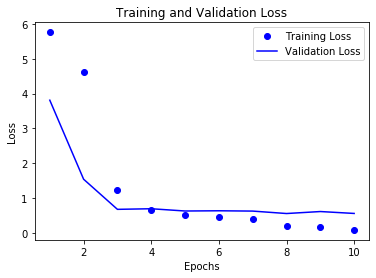

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

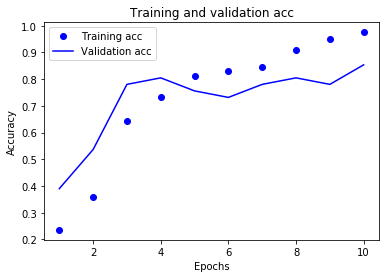

In [13]:
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title("Training and validation acc")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
from keras import models
from keras import layers
from keras.layers import Dropout

model = models.Sequential()
model.add(layers.Dense(5000, activation='relu', input_shape=(20605,)))
model.add(Dropout(0.5))
model.add(layers.Dense(5000, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(5000, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))
                    
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_dev,
                    y_dev, 
                    epochs=11, 
                    batch_size=32, 
                    validation_data=(X_val, y_val))

Train on 123 samples, validate on 41 samples
Epoch 1/11
123/123 [==============================] - 1s 8ms/step - loss: 4.6889 - acc: 0.2764 - val_loss: 3.9285 - val_acc: 0.2439
Epoch 2/11
123/123 [==============================] - 1s 5ms/step - loss: 3.0396 - acc: 0.4472 - val_loss: 1.3320 - val_acc: 0.6341
Epoch 3/11
123/123 [==============================] - 1s 5ms/step - loss: 1.7813 - acc: 0.6016 - val_loss: 0.7257 - val_acc: 0.7805
Epoch 4/11
123/123 [==============================] - 1s 5ms/step - loss: 0.4206 - acc: 0.8130 - val_loss: 0.6566 - val_acc: 0.7561
Epoch 5/11
123/123 [==============================] - 1s 5ms/step - loss: 0.5127 - acc: 0.8211 - val_loss: 0.6175 - val_acc: 0.8049
Epoch 6/11
123/123 [==============================] - 1s 5ms/step - loss: 0.3603 - acc: 0.8618 - val_loss: 0.7532 - val_acc: 0.7317
Epoch 7/11
123/123 [==============================] - 1s 5ms/step - loss: 0.2506 - acc: 0.9024 - val_loss: 0.6047 - val_acc: 0.8049
Epoch 8/11
123/123 [===========

In [15]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print('test_acc',test_acc)

42/42 [==============================] - 1s 20ms/step
test_acc 0.8571428599811736


In [16]:
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(6)]
y_test_classes = np.argmax(y_test, axis=-1)
print(classification_report(y_test_classes, predicted_classes, target_names=target_names))
#print(y_test_classes)
#print(predicted_classes)

              precision    recall  f1-score   support

     Class 0       0.29      1.00      0.44         2
     Class 1       0.50      0.25      0.33         4
     Class 2       0.75      0.67      0.71         9
     Class 3       0.90      0.90      0.90        10
     Class 4       1.00      0.88      0.93        16
     Class 5       1.00      1.00      1.00         1

    accuracy                           0.79        42
   macro avg       0.74      0.78      0.72        42
weighted avg       0.84      0.79      0.80        42



In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_classes, predicted_classes)

array([[ 2,  0,  0,  0,  0,  0],
       [ 1,  1,  2,  0,  0,  0],
       [ 1,  1,  6,  1,  0,  0],
       [ 1,  0,  0,  9,  0,  0],
       [ 2,  0,  0,  0, 14,  0],
       [ 0,  0,  0,  0,  0,  1]])